In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

Helpful functions:

In [2]:
def create_circle_pattern(matrix, row, col, radius):
    n = matrix.shape[0]
    x, y = np.ogrid[:n, :n]
    dist = np.sqrt((x-row)**2 + (y-col)**2)
    matrix[dist <= radius] = 1
    return matrix

In [3]:
# Constants / problem paramters
freq = 1e6              # Drive frequency
omega_rf = 2 * np.pi *freq
m = 40.077 / 1000 / 6.022e23 # [kg] molecular weight / Avogadro to get
q_e = 1.60218e-19       # [C] Charge 
r_0 = 10e-3             # [m] Radius of trap electrodes
V_dc = 0                # [V] DC voltage 
T = 1 / omega_rf        # [s] Period
T = 10

# Mathieu Equation

First, let's find stable solutions to Mathieu's equation

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import mathieu_a, mathieu_cem

q_range = np.linspace(0, 50, 500)
a_range = np.linspace(0, 1, 100)
q_grid, a_grid = np.meshgrid(q_range, a_range)

def eval_mathieu(q, a):
    a_vals = mathieu_a(q, np.arange(0, 10))
    q_vals = mathieu_cem(q, np.arange(0, 10))
    return a_vals, q_vals

a_vals, q_vals = np.vectorize(eval_mathieu)(q_grid, a_grid)

plt.imshow((a_vals < 1) & (q_vals > 0), extent=(0, 50, 0, 1), origin='lower', cmap='binary', aspect='auto')
plt.xlabel('q')
plt.ylabel('a')
plt.show()


ImportError: cannot import name 'mathieu_cm' from 'scipy.special' (C:\Users\rmcgill9\Anaconda3\envs\phys\lib\site-packages\scipy\special\__init__.py)

i=0 j=0
i=1 j=0
i=2 j=0
i=3 j=0
i=4 j=0
i=5 j=0
i=6 j=0
i=7 j=0
i=8 j=0
i=9 j=0
i=10 j=0
i=11 j=0
i=12 j=0
i=13 j=0
i=14 j=0
i=15 j=0
i=16 j=0
i=17 j=0
i=18 j=0
i=19 j=0
i=20 j=0
i=21 j=0
i=22 j=0
i=23 j=0
i=24 j=0
i=25 j=0
i=26 j=0
i=27 j=0
i=28 j=0
i=29 j=0
i=30 j=0
i=31 j=0
i=32 j=0
i=33 j=0
i=34 j=0
i=35 j=0
i=36 j=0
i=37 j=0
i=38 j=0
i=39 j=0
i=40 j=0
i=41 j=0
i=42 j=0
i=43 j=0
i=44 j=0
i=45 j=0
i=46 j=0
i=47 j=0
i=48 j=0
i=49 j=0
i=0 j=1
i=1 j=1
i=2 j=1
i=3 j=1
i=4 j=1
i=5 j=1
i=6 j=1
i=7 j=1
i=8 j=1
i=9 j=1
i=10 j=1
i=11 j=1
i=12 j=1
i=13 j=1
i=14 j=1
i=15 j=1
i=16 j=1
i=17 j=1
i=18 j=1
i=19 j=1
i=20 j=1
i=21 j=1
i=22 j=1
i=23 j=1
i=24 j=1
i=25 j=1
i=26 j=1
i=27 j=1
i=28 j=1
i=29 j=1
i=30 j=1
i=31 j=1
i=32 j=1
i=33 j=1
i=34 j=1
i=35 j=1
i=36 j=1
i=37 j=1
i=38 j=1
i=39 j=1
i=40 j=1
i=41 j=1
i=42 j=1
i=43 j=1
i=44 j=1
i=45 j=1
i=46 j=1
i=47 j=1
i=48 j=1
i=49 j=1
i=0 j=2
i=1 j=2
i=2 j=2
i=3 j=2
i=4 j=2
i=5 j=2
i=6 j=2
i=7 j=2
i=8 j=2
i=9 j=2
i=10 j=2
i=11 j=2
i=12 j=2
i=13 j=2
i=14

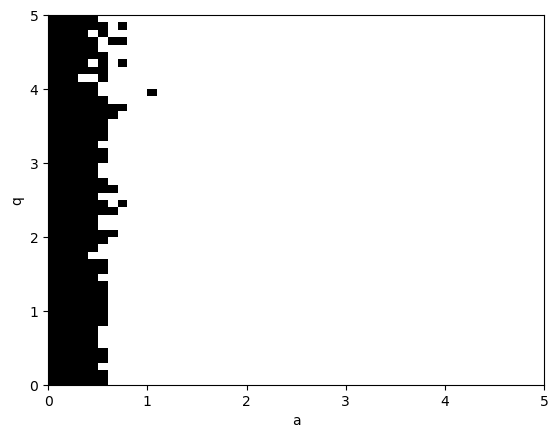

In [51]:
# Define the range of a and q values to plot
a_min = 0
a_max = 5
q_min = 0
q_max = 5
num_points = 50
a_values = np.linspace(a_min, a_max, num_points)
q_values = np.linspace(q_min, q_max, num_points)

def mathieu2(t,r,a,q):
    y1, y2 = r
    dy1dt = y2
    dy2dt =  (a - 2 * q * np.cos(omega_rf * 2 * t)) * y1
    return np.array([dy1dt,dy2dt])


x = np.linspace(0,np.rad2deg(100*np.pi),num_points)

# Define a function to check the stability of a given initial condition
def is_stable(a, q, y1_0, y2_0,tau,N):
    # r = mathieu_solver(a,q,y1_0,y2_0,tau,N)
    sol = solve_ivp(lambda t, r: mathieu2(t,r,a,q),t_span=(0,tau), y0=np.array([y1_0,y2_0]))
    return np.max(np.abs(sol.y)) < 1000
    
# Compute the stability for all values of a and q
y1_0 = 0.0 # Initial position
y2_0 = 1.0 # Initial velocity

stability = np.zeros((num_points,num_points), float)

m = 0
for j,q in enumerate(q_values):
    for i,a in enumerate(a_values):
        print("i={} j={}".format(i,j))
        if is_stable(a,q,y1_0,y2_0,tau=T,N=100):
            stability[j,i] = 1
        
# Plot the stability diagram
fig, ax = plt.subplots()
im = ax.imshow(stability, extent=[a_min, a_max, q_min, q_max], origin='lower', cmap='gray_r', aspect='auto')
ax.set_xlabel('a')
ax.set_ylabel('q')
plt.show()


In [41]:
# Define the range of a and q values to plot
a_min = 0
a_max = 5
q_min = 0
q_max = 5
num_points = 100
a_values = np.linspace(a_min, a_max, num_points)
q_values = np.linspace(q_min, q_max, num_points)

from scipy.special import mathieu_cem

# Define Mathieu Equation
def mathieu(r,t,a,q):
    y1, y2 = r
    dy1dt = y2
    dy2dt =  (a - 2 * q * np.cos(omega_rf * 2 * t)) * y1
    return np.array([dy1dt,dy2dt])

def mathieu2(t,r,a,q):
    y1, y2 = r
    dy1dt = y2
    dy2dt =  (a - 2 * q * np.cos(omega_rf * 2 * t)) * y1
    return np.array([dy1dt,dy2dt])

def mathieu_solver(a,q,y1_0,y2_0,tau,N):
    h = tau/N
    tpoints = np.arange(0.0,tau,h)
    r = np.zeros((N,2))
    r[0] =[y1_0,y2_0]

    for i,t in enumerate(tpoints[1:],1):
        k1 = h * mathieu(r[i-1], t, a, q)
        k2 = h * mathieu(r[i-1]+0.5*k1, t+0.5*h, a, q)
        k3 = h * mathieu(r[i-1]+0.5*k2, t+0.5*h, a, q)
        k4 = h * mathieu(r[i-1]+k3, t+h, a, q)
        r[i] = r[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    
    return r

# Define a function to check the stability of a given initial condition
def is_stable(a, q, y1_0, y2_0,tau,N):
    # r = mathieu_solver(a,q,y1_0,y2_0,tau,N)
    # sol = solve_ivp(lambda t, r: mathieu2(t,r,a,q),t_span=(0,10.0), y0=np.array([0.0,1.0]))
    
    
    if np.isnan(sol.y).any() or np.isinf(sol.y).any():
        return False
    max_pos = np.max(np.abs(sol.y))    # Maximum distance
    # Unbounded = 2*initial
    
    thresh = 1000.0
    return max_pos < thresh


# Compute the stability for all values of a and q
y1_0 = 0.0 # Initial position
y2_0 = 1.0 # Initial velocity

stability = np.zeros((num_points,num_points), float)
test_time = 1000

for i,a in enumerate(a_values):
    
    for j,q in enumerate(q_values):
        if i == 6 and j == 8:
            break
        print("i={} j={}".format(i,j))
        if is_stable(a,q,y1_0,y2_0,tau=test_time,N=num_points):
            stability[j,i] = 1
            





# Plot the stability diagram
fig, ax = plt.subplots()
im = ax.imshow(stability, extent=[a_min, a_max, q_min, q_max], origin='lower', cmap='gray_r', aspect='auto')
ax.set_xlabel('a')
ax.set_ylabel('q')
plt.show()


i=0 j=0
i=0 j=1
i=0 j=2
i=0 j=3
i=0 j=4
i=0 j=5
i=0 j=6
i=0 j=7
i=0 j=8
i=0 j=9
i=0 j=10
i=0 j=11
i=0 j=12
i=0 j=13
i=0 j=14
i=0 j=15
i=0 j=16
i=0 j=17
i=0 j=18
i=0 j=19
i=0 j=20
i=0 j=21
i=0 j=22
i=0 j=23
i=0 j=24
i=0 j=25
i=0 j=26
i=0 j=27
i=0 j=28
i=0 j=29
i=0 j=30
i=0 j=31
i=0 j=32
i=0 j=33
i=0 j=34
i=0 j=35
i=0 j=36
i=0 j=37
i=0 j=38
i=0 j=39
i=0 j=40
i=0 j=41
i=0 j=42
i=0 j=43
i=0 j=44
i=0 j=45
i=0 j=46
i=0 j=47
i=0 j=48
i=0 j=49
i=0 j=50
i=0 j=51
i=0 j=52
i=0 j=53
i=0 j=54
i=0 j=55
i=0 j=56
i=0 j=57
i=0 j=58
i=0 j=59


KeyboardInterrupt: 

Now that we know the regions of stability, we can choose adequate a and q parameters to have bounded motion. Here I use the RK4 method to numerically solve the equations for position and velocity of the particle in the trap.

nan
False


C:\Users\rmcgill9\AppData\Local\Temp\ipykernel_31100\2520742882.py:27: RuntimeWarning: overflow encountered in multiply
  k4 = h * mathieu(r[i-1]+k3, t+h, a, q)
C:\Users\rmcgill9\AppData\Local\Temp\ipykernel_31100\2520742882.py:25: RuntimeWarning: invalid value encountered in add
  k2 = h * mathieu(r[i-1]+0.5*k1, t+0.5*h, a, q)
C:\Users\rmcgill9\AppData\Local\Temp\ipykernel_31100\2520742882.py:26: RuntimeWarning: invalid value encountered in add
  k3 = h * mathieu(r[i-1]+0.5*k2, t+0.5*h, a, q)


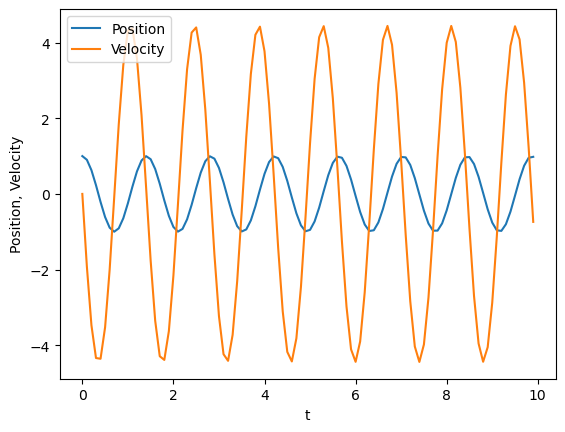

In [11]:
# Initial conditions
y1_0 = 1.0
y2_0 = 0.0
a = .1
q = 10

# Define Mathieu Equation
def mathieu(r,t,a,q):
    y1, y2 = r
    dy1dt = y2
    dy2dt =  (a - 2 * q * np.cos(omega_rf * 2 * t)) * y1
    return np.array([dy1dt,dy2dt])

T = 10
N = 100
h = T/N
tpoints = np.arange(0.0,T,h)
r = np.zeros((N,2))
r[0] =[y1_0,y2_0]

for i,t in enumerate(tpoints[1:],1):
    k1 = h * mathieu(r[i-1], t, a, q)
    k2 = h * mathieu(r[i-1]+0.5*k1, t+0.5*h, a, q)
    k3 = h * mathieu(r[i-1]+0.5*k2, t+0.5*h, a, q)
    k4 = h * mathieu(r[i-1]+k3, t+h, a, q)
    r[i] = r[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

print(is_stable(a,q,y1_0,y2_0,tau=1000,N=N))

plt.plot(tpoints, r[:,0], label=r'Position')
plt.plot(tpoints, r[:,1], label=r'Velocity')
plt.xlabel("t")
plt.ylabel(r"Position, Velocity")
plt.legend()
plt.show()

# Electric field solutions:

In [ ]:
# Constants
M = 100             # Grid squares on a side


A = 35              # Electric field amplitude
rod_radius = 25

coords_pos = [[rod_radius+1,rod_radius+1],[M-rod_radius-1,M-rod_radius-1]]
coords_neg = [[M-rod_radius-1,rod_radius+1],[rod_radius+1,M-rod_radius-1]]
pos_bit_pattern = np.zeros([M+1,M+1])
neg_bit_pattern = np.zeros([M+1,M+1])
for row,col in coords_pos:
    pos_bit_pattern = create_circle_pattern(pos_bit_pattern,row,col,rod_radius)
for row,col in coords_neg:
    neg_bit_pattern = create_circle_pattern(neg_bit_pattern,row,col,rod_radius)
# Now we have an easy way to device the negative and positive voltages


In [ ]:
# Find the electrostatic field at the given time step.
# In time, we want to iterate over one period.
N = 10 # time steps
period = 1 / omega_rf

time_step = np.linspace(start=0.0,stop=period,num=N)
a = 1e-3 # 1mm spacing

# We will call our two rods by their initial voltage pattern
negvoltage = -A * np.cos(time_step * omega_rf)
posvoltage = A * np.cos(time_step * omega_rf)
# Make a cumulative average, or a total matrix
phi_all = np.zeros((N,M+1,M+1),dtype=float)
it = 0
# Eventually will loop, for now let's take a look at one stable solution
for t in time_step:
    target = 1e-6
    epsilon_0 = 8.85e-12


    phi = np.zeros([M+1,M+1], float)
    rho = np.zeros([M+1,M+1], float)
    rho = rho + neg_bit_pattern * negvoltage[it] + pos_bit_pattern * posvoltage[it]
    phi = phi + neg_bit_pattern * negvoltage[it] + pos_bit_pattern * posvoltage[it]
    phiprime = np.zeros([M+1,M+1], float)

    # Main loop
    delta = 1.0
    iteration = 0
    while delta>target:
        # Calculate new values of the potential
        phiprime[0,:] = phi[0,:]
        phiprime[-1,:] = phi[-1,:]
        phiprime[:,0] = phi[:,0]
        phiprime[:,-1] = phi[:,-1]


        phiprime[1:M,1:M] = 0.25 * (phi[2:,1:M] + phi[:M-1,1:M] + phi[1:M,2:] + phi[1:M,:M-1]) + \
            (0.25 * a**2 / epsilon_0) * rho[1:M,1:M]    
                                        
        # Calculate maximum fractional difference from old values
        delta = np.abs(phi-phiprime)
        nonzero = phi > 0
        if nonzero.any():

            delta = np.max(delta[nonzero])
        else:
            delta = 1.0
       

        # Swap the two arrays around
        phi,phiprime = phiprime,phi
        iteration += 1
    phi_all[it] = phi
    print(it)
    it += 1




In [ ]:
from PIL import Image, ImageDraw
from matplotlib import cm
import imageio
from matplotlib.backends.backend_agg import FigureCanvasAgg


cmap = plt.get_cmap('seismic')

frames = []
for electric_field in phi_all:
    fig, ax = plt.subplots()
    im = ax.imshow(electric_field, cmap=cmap)
    # Add frame to list of frames
    canvas = FigureCanvasAgg(fig)
    canvas.draw()
    frame = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
imageio.mimsave('efield.gif',frames,fps=10)